In [106]:
import joblib

# Logistic Regression

In [107]:
log_reg_first_ver = joblib.load("Models/default_log_reg_first_ver.pkl") 

In [108]:
import numpy as np

X_train = np.genfromtxt("Data/X_train.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train.csv", delimiter=',')

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
cross_val_score(log_reg_first_ver, X_train, y_train, cv=3, scoring="f1")

array([0.42764016, 0.43924626, 0.44762524])

In [111]:
from sklearn.model_selection import cross_val_predict

In [112]:
y_train_pred = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3)

In [113]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [114]:
confusion_matrix(y_train, y_train_pred)

array([[7894,  732],
       [1858, 1010]], dtype=int64)

In [115]:
precision_score(y_train, y_train_pred)

0.5797933409873708

In [116]:
recall_score(y_train, y_train_pred)

0.3521617852161785

In [117]:
from sklearn.metrics import f1_score

In [118]:
f1_score(y_train, y_train_pred)

0.438177874186551

In [119]:
from sklearn.metrics import precision_recall_curve

In [120]:
y_scores = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3, method="predict_proba")

In [121]:
y_scores

array([[0.51745339, 0.48254661],
       [0.92496695, 0.07503305],
       [0.89596833, 0.10403167],
       ...,
       [0.871711  , 0.128289  ],
       [0.84248748, 0.15751252],
       [0.85408835, 0.14591165]])

In [122]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])

In [123]:
f1 = (2 * precisions * recalls)/(precisions + recalls)

In [124]:
import matplotlib.pyplot as plt

In [125]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, f1[:-1], "r--", label="F1")

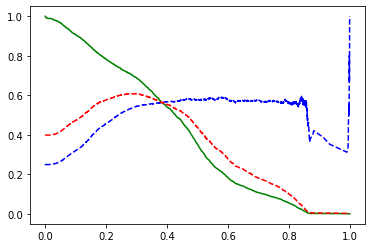

In [126]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1)

In [127]:
THRESHOLD = thresholds[np.argmax(f1[:-1])]
THRESHOLD

0.27926642000580437

In [128]:
preds = np.where(log_reg_first_ver.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [129]:
import pandas as pd

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
pd.DataFrame(data=[accuracy_score(y_train, preds),
                   recall_score(y_train, preds),
                   precision_score(y_train, preds),
                   f1_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.781277
recall,0.723501
precision,0.546628
f1_score,0.622749


### Test set

In [132]:
X_test = np.genfromtxt("Data/X_test.csv", delimiter=',')
y_test = np.genfromtxt("Data/y_test.csv", delimiter=',')

In [133]:
y_test_pred = np.where(log_reg_first_ver.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [134]:
pd.DataFrame(data=[accuracy_score(y_test, y_test_pred),
                   recall_score(y_test, y_test_pred),
                   precision_score(y_test, y_test_pred),
                   f1_score(y_test, y_test_pred)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.770877
recall,0.691461
precision,0.530760
f1_score,0.600546


In [135]:
log_reg_first_ver.n_iter_

array([20])

In [136]:
np.max(np.abs(log_reg_first_ver.coef_))

0.4176207764985929